# Binomial Distribution

Compute the probability of getting X successes in N trials. (the success event only has two outcomes: success or fail)

The binomial distribution allows one to compute the probability of obtaining a given number of binary outcomes. 

the mean of a binomial distribution with parameters N (the number of trials) and p (the probability of success on each trial) is: n*p

E(X) = n*p
Var(x) = n*p*(p-1)


<img src="BinomialDistribution.png">
------------------------------------- in Python
from scipy.stats import binom
P(X=x) = binom.pmf(x, n, p)  # probability mass function
P(X<=x) = binom.cdf(x, n, p)  # cumulative distribution function

In [5]:
%matplotlib inline
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [53]:
# plot the binomial distribution
def plot_binom(n, p, pmf = True, cdf = False, **kwargs):
    fig, ax = plt.subplots(1,1)
    # set the boundary of x
    x = np.arange(0, 
                  binom.ppf(0.99, n, p))
    
    xticks = np.arange(0, 
                  binom.ppf(0.99, n, p), step = 2)
    
    plt.xticks(xticks)
    # plot probability mass function
    if pmf:
        ax.plot(x, binom.pmf(x, n, p), color = 'gray')
        ax.plot(x, binom.pmf(x, n, p), 'bo' , ms = 5, label='binom pmf' )
        ax.vlines(x, 0, binom.pmf(x, n, p), lw = 2, colors = 'black', alpha = 0.5)
    
    # plot the cumulative distribution function
    if cdf:
        ax.plot(x, binom.cdf(x, n, p), **kwargs)
    

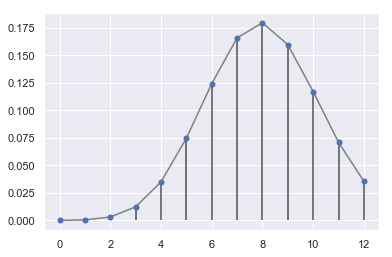

In [54]:
n = 20
p = 0.4

plot_binom(n, p)

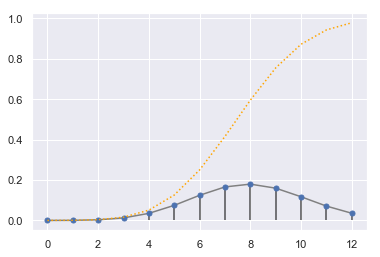

In [55]:
plot_binom(n, p, cdf = True, color = 'orange', linestyle = ':')

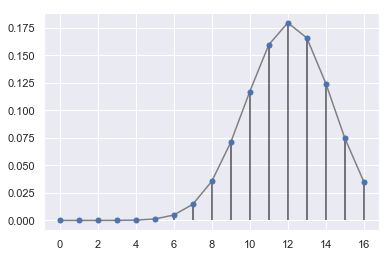

In [56]:
n = 20
p = 0.6

plot_binom(n, p)

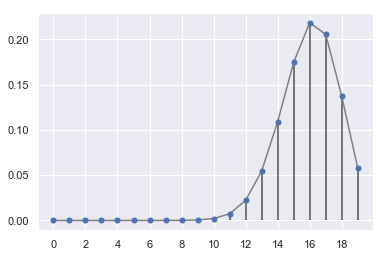

In [58]:
n = 20
p = 0.8

plot_binom(n, p)

suppose that the coin is biased. The probability of heads is only 0.4. What is the probability of getting heads at least once in two tosses? 

In [15]:
p = 0.4
n = 2
1- binom.cdf(0, n, p)  # p(x>=1) = 1 - p(x<1) = 1 - p(x<=0)

0.64

We toss a coin 12 times. What is the probability that we get from 0 to 3 heads?

In [16]:
n = 12
p = 0.5

a = 0
b = 3 

# p(a<=X <=b) = p(X <=3) - p(X <=a-1)
binom.cdf(b, n, p) - binom.cdf(max(0, a-1), n, p)

0.07275390625000001

The probability that you will win a game is 0.45. (a) If you play the game 80 times, what is the most likely number of wins? (b) What are the mean and standard deviation of a binomial distribution with π = 0.45 and N = 80? 

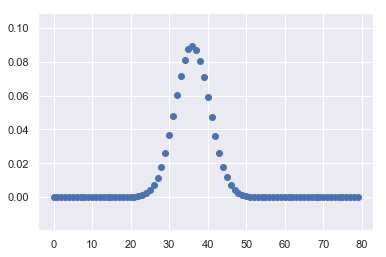

In [61]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

p=0.45
n=80

x = np.arange(0, n)
plt.scatter(x, binom.pmf(x,n,p))

In [62]:
binom.stats(n, p, moments = 'mv')

(array(36.), array(19.8))

In [63]:
print(binom.mean(n,p))
print(binom.median(n,p))
print(binom.var(n,p))
print(binom.std(n,p))

36.0
36.0
19.8
4.449719092257398


A fair coin is flipped 9 times. What is the probability of getting exactly 6 heads? (relevant section)

In [65]:
p = 0.5
n = 9
x = 6

binom.pmf(x, n, p)

0.16406250000000006

When Susan and Jessica play a card game, Susan wins 60% of the time. If they play 9 games, what is the probability that Jessica will have won more games than Susan? (relevant section)

In [66]:
p = 0.6
n = 9
x = 4

## probability that Susan wins less than half of the 9 games (i.e. <=4 games)
binom.cdf(x, n, p)

## the probability that Jessica will have won more games than Susan is the probability that Sustan win less than or equal to 4 games

0.26656768000000003

You flip a coin three times. (a) What is the probability of getting heads on only one of your flips? (b) What is the probability of getting heads on at least one flip?

In [69]:
p = 0.5
n = 3
x = 1

# the probability of getting heads on only one of these 3 flips
print(binom.pmf(x, n, p))

# the probability of getting heads on at least one flip  P(X>=1)
print(1-binom.cdf(0, n, p))

0.375
0.875


You win a game if you roll a die and get a 2 or a 5. You play this game 60 times.

What is the probability that you win between 5 and 10 times (inclusive)?
What is the probability that you will win the game at least 15 times?
What is the probability that you will win the game at least 40 times?
What is the most likely number of wins.
What is the probability of obtaining the number of wins in d?

In [82]:
p = 1/3
n = 60

print("the probability that you win between 5 and 10 times: \t %.3f" %(binom.cdf(10, n, p) - binom.cdf(4, n, p)))
print("the probability that you will win the game at least 15 times \t %.3f" %(1- binom.cdf(14, n, p)))
print("the probability that you will win the game at least 40 times \t", 1-binom.cdf(39, n, p))
print("the most likely number of wins \t %d" %(binom.mean(n, p)))

print("the probability of obtaining the number of wins in d \t %.3f" %(binom.pmf(binom.mean(n, p), n, p)))
print(binom.pmf(binom.mean(n, p) - 1, n, p))
print(binom.pmf(binom.mean(n, p) + 1, n, p))
print("the median number of wins \t %d" % (binom.median(n, p)))

the probability that you win between 5 and 10 times: 	 0.003
the probability that you will win the game at least 15 times 	 0.937
the probability that you will win the game at least 40 times 	 1.3617600325144252e-07
the most likely number of wins 	 20
the probability of obtaining the number of wins in d 	 0.109
0.1060732419036921
0.10354768852503181
the median number of wins 	 20
